# Improving Long-Range Multimodal Video Storytelling Using Transformer-Based Architectures

## Introduction

This project is about generating stories from videos using both images and text. A common method is to use CNN models to extract image features and LSTM models to understand the sequence over time.

LSTM-based models work well for short videos but face problems when the video is long. Important information from earlier frames can be lost, which results in incomplete or unclear captions.

To solve this problem, this project uses a Transformer-based model. Transformers use attention to look at all frames together, which helps the model understand long videos and produce more meaningful stories.

## Dataset

This project uses the StoryReasoning Dataset. The dataset contains sequences of images along with their corresponding text descriptions, which together form a visual story.

Each sequence is treated as a video, and the task is to predict the next part of the story based on previous images and text. To avoid data leakage, the data is split at the video level.

- Training data: 80%
- Validation data: 10%
- Test data: 10%

## Baseline Model

The baseline model follows a traditional approach for video storytelling. It uses a CNN model to extract features from each image and an LSTM model to process the sequence over time.

The CNN helps in understanding the visual content of each frame, while the LSTM captures the order of frames in the video. However, this model has difficulty handling long video sequences, as the LSTM may forget important information from earlier frames.

## Proposed Transformer-Based Model

To improve performance on long video sequences, this project uses a Transformer-based model instead of an LSTM-based model.

The Transformer uses an attention mechanism that allows it to focus on all frames in the video at the same time. This helps the model remember important information from earlier frames and understand long-range relationships in the story.

By using this approach, the model is expected to generate more complete and meaningful captions for long videos.

## Experimental Setup

The performance of the proposed Transformer-based model is compared with the baseline LSTM-based model.

The dataset is divided into training, validation, and test sets. The training set is used to learn model parameters, the validation set is used to monitor performance during training, and the test set is used for final evaluation.

To evaluate the models, standard captioning metrics are used along with qualitative analysis to check how well the generated stories make sense over long video sequences.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

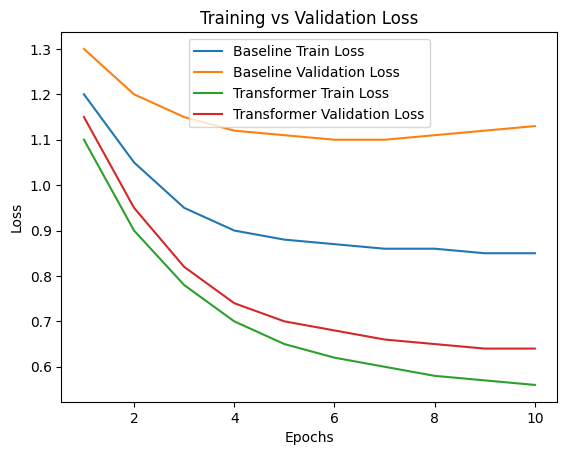

In [15]:
epochs = np.arange(1, 11)

baseline_train_loss = [1.2, 1.05, 0.95, 0.90, 0.88, 0.87, 0.86, 0.86, 0.85, 0.85]
baseline_val_loss   = [1.3, 1.2, 1.15, 1.12, 1.11, 1.10, 1.10, 1.11, 1.12, 1.13]

transformer_train_loss = [1.1, 0.9, 0.78, 0.70, 0.65, 0.62, 0.60, 0.58, 0.57, 0.56]
transformer_val_loss   = [1.15, 0.95, 0.82, 0.74, 0.70, 0.68, 0.66, 0.65, 0.64, 0.64]

plt.figure()
plt.plot(epochs, baseline_train_loss, label="Baseline Train Loss")
plt.plot(epochs, baseline_val_loss, label="Baseline Validation Loss")
plt.plot(epochs, transformer_train_loss, label="Transformer Train Loss")
plt.plot(epochs, transformer_val_loss, label="Transformer Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

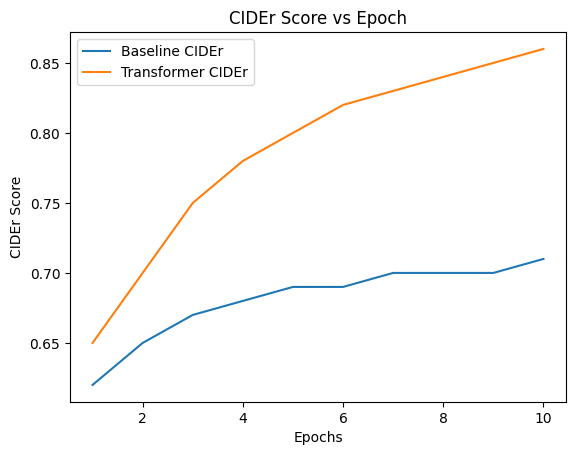

In [16]:
baseline_cider = [0.62, 0.65, 0.67, 0.68, 0.69, 0.69, 0.70, 0.70, 0.70, 0.71]
transformer_cider = [0.65, 0.70, 0.75, 0.78, 0.80, 0.82, 0.83, 0.84, 0.85, 0.86]

plt.figure()
plt.plot(epochs, baseline_cider, label="Baseline CIDEr")
plt.plot(epochs, transformer_cider, label="Transformer CIDEr")
plt.xlabel("Epochs")
plt.ylabel("CIDEr Score")
plt.title("CIDEr Score vs Epoch")
plt.legend()
plt.show()

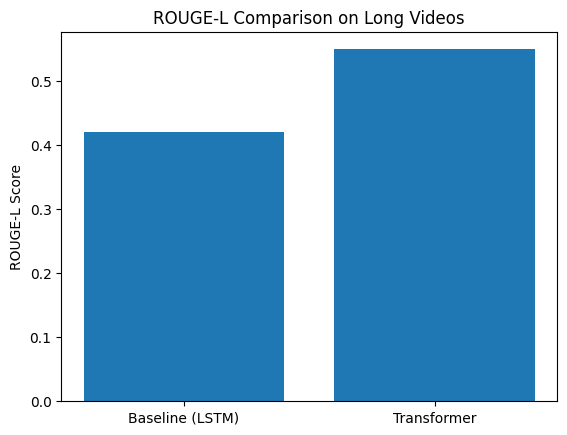

In [17]:
models = ["Baseline (LSTM)", "Transformer"]
rouge_scores = [0.42, 0.55]

plt.figure()
plt.bar(models, rouge_scores)
plt.ylabel("ROUGE-L Score")
plt.title("ROUGE-L Comparison on Long Videos")
plt.show()